In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)

In [3]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0886111501_PN16grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.746e-02 +/- 4.085e-03 (23.7 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.531e+04 sec
 Using fit statistic: chi
 Using Background File                0886111501_PN16spec_bkg.fits
  Background Exposure Time: 1.531e+04 sec
 Using Response (RMF) File            0886111501_PN16spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886111501_PN16spec.arf



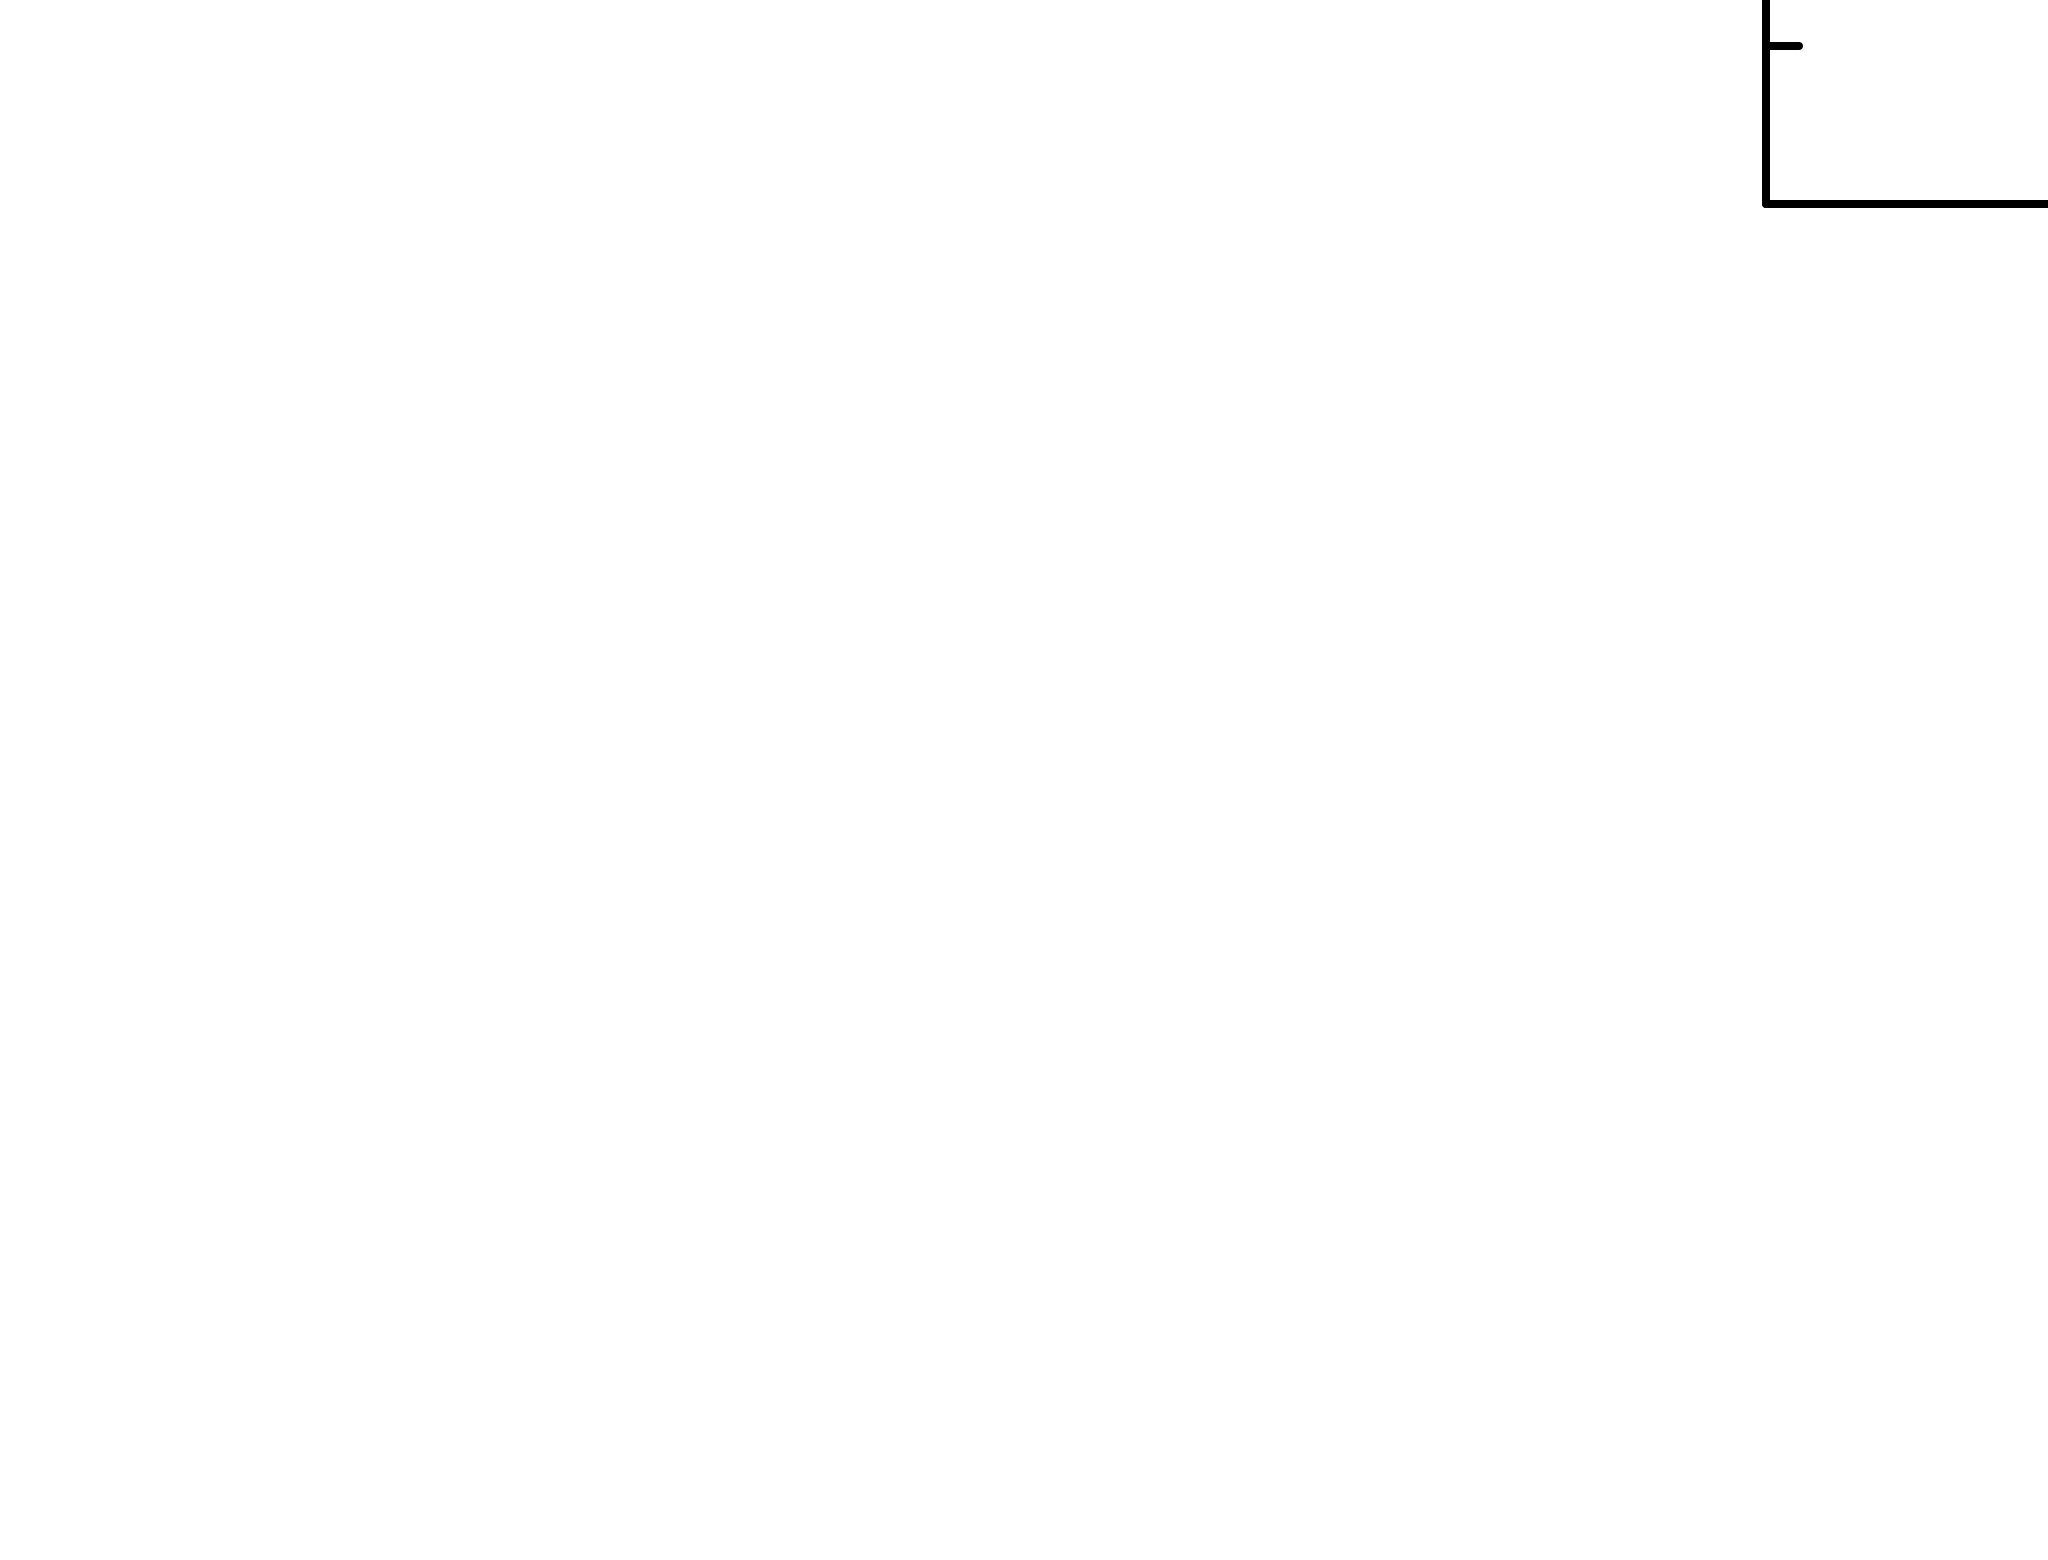

In [4]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0005 0.1")
Plot("data")

     5 channels (1-5) ignored in spectrum #     1
     1 channels (12) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross se

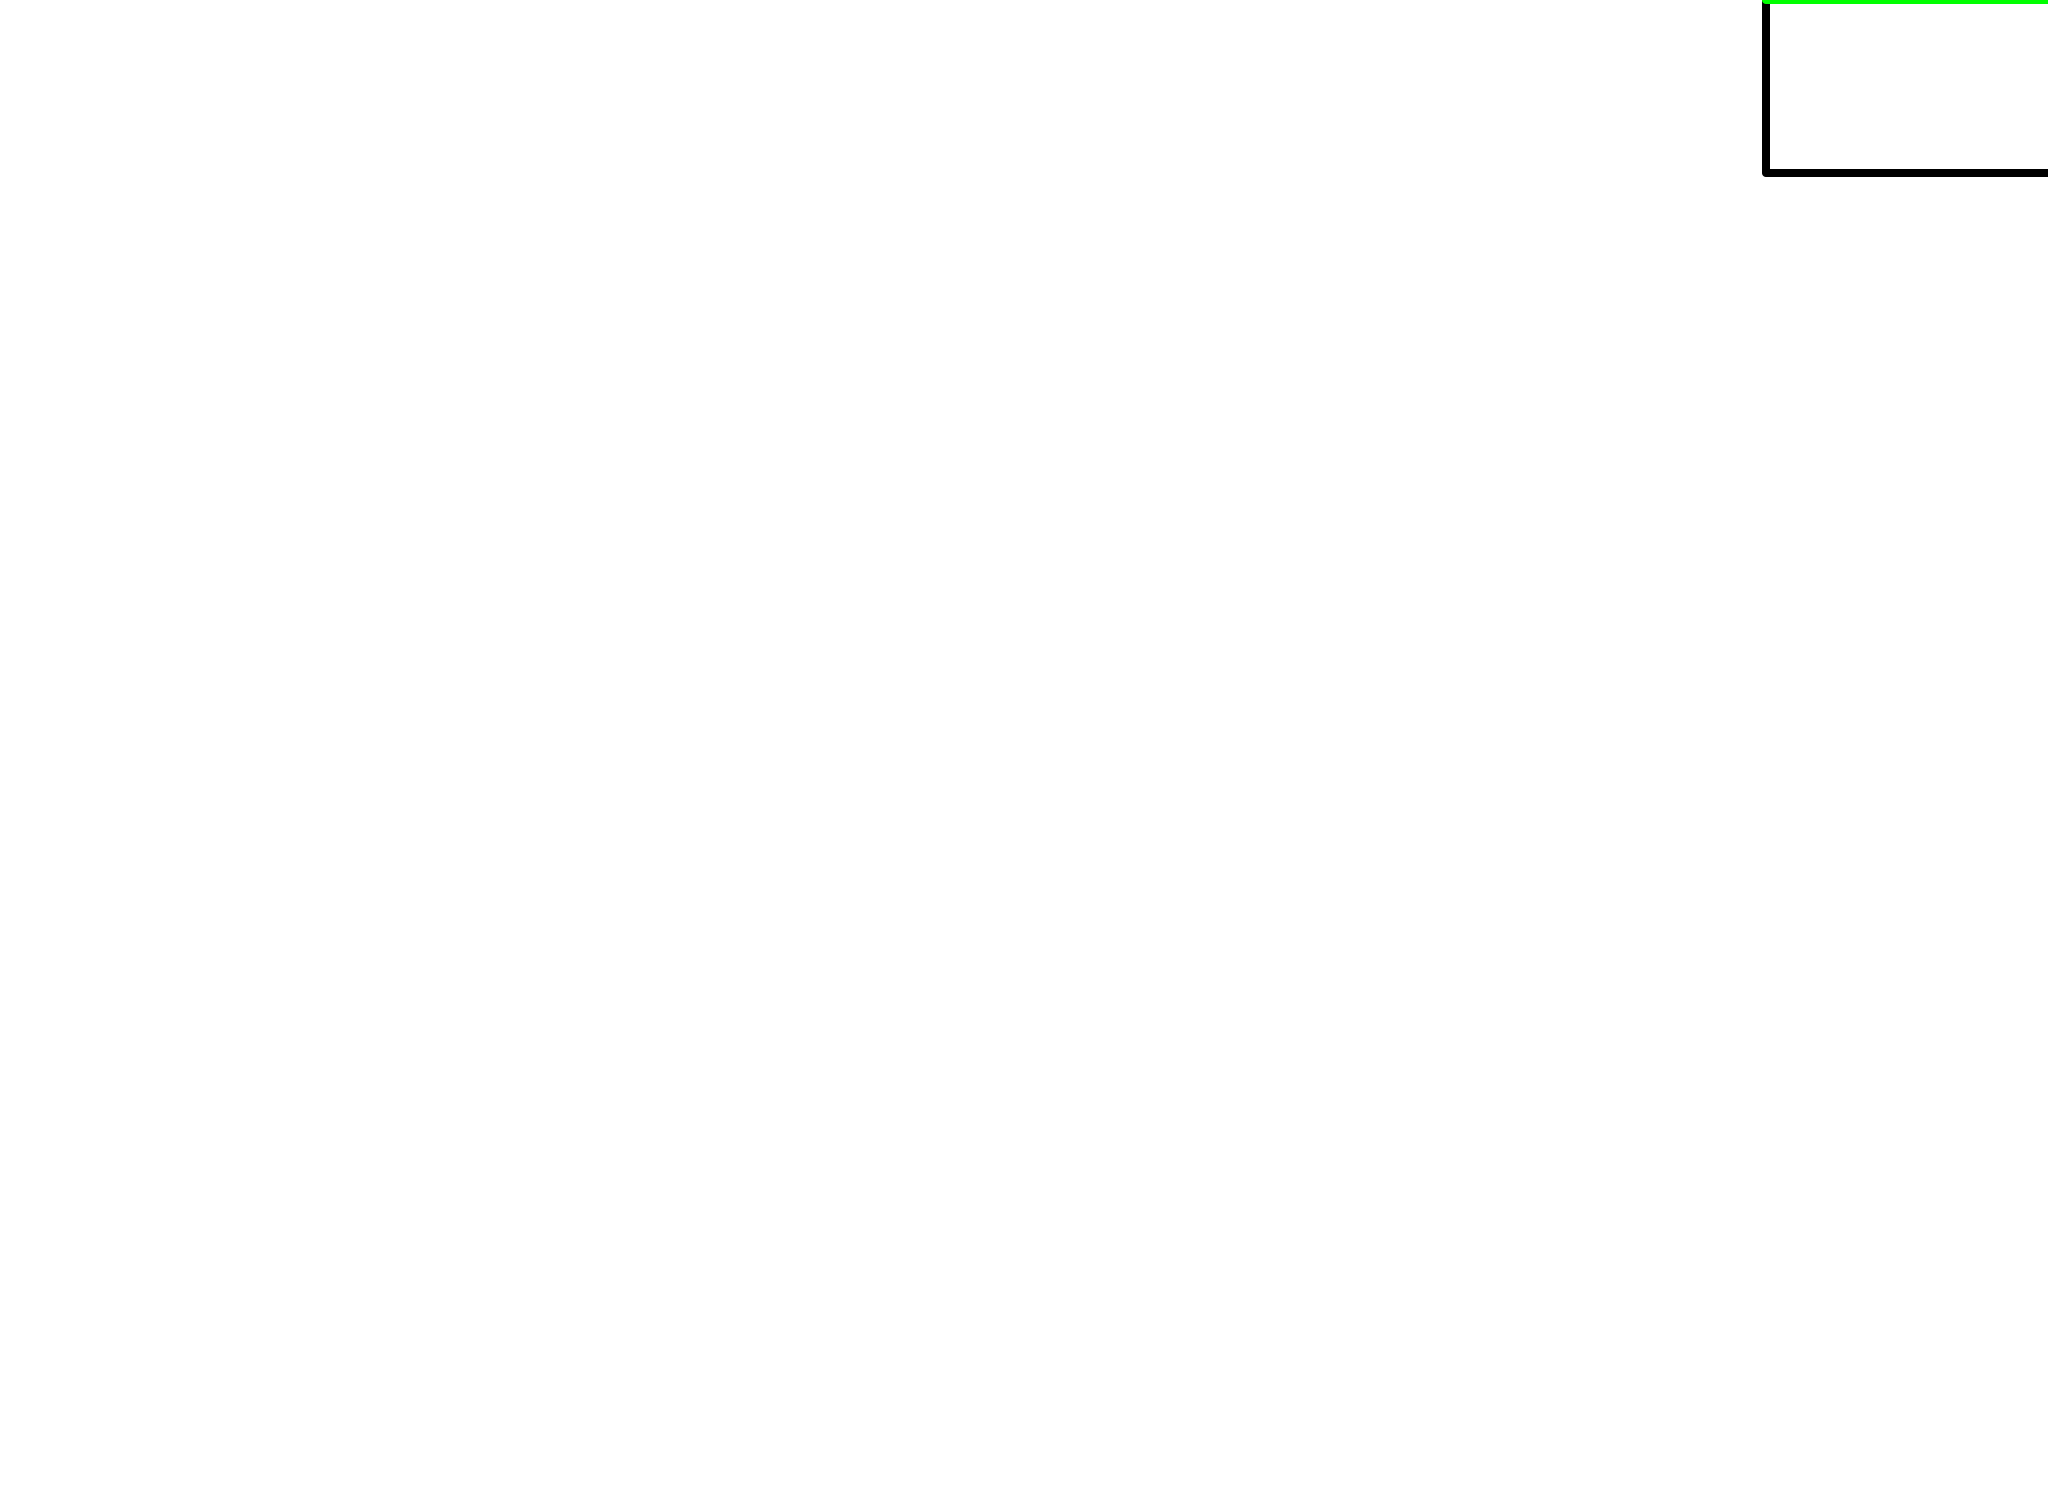

In [5]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [6]:
# Fit.error("1")
# Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[0,4:7] = mo.bbody.kT.values[0], np.inf, np.inf
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


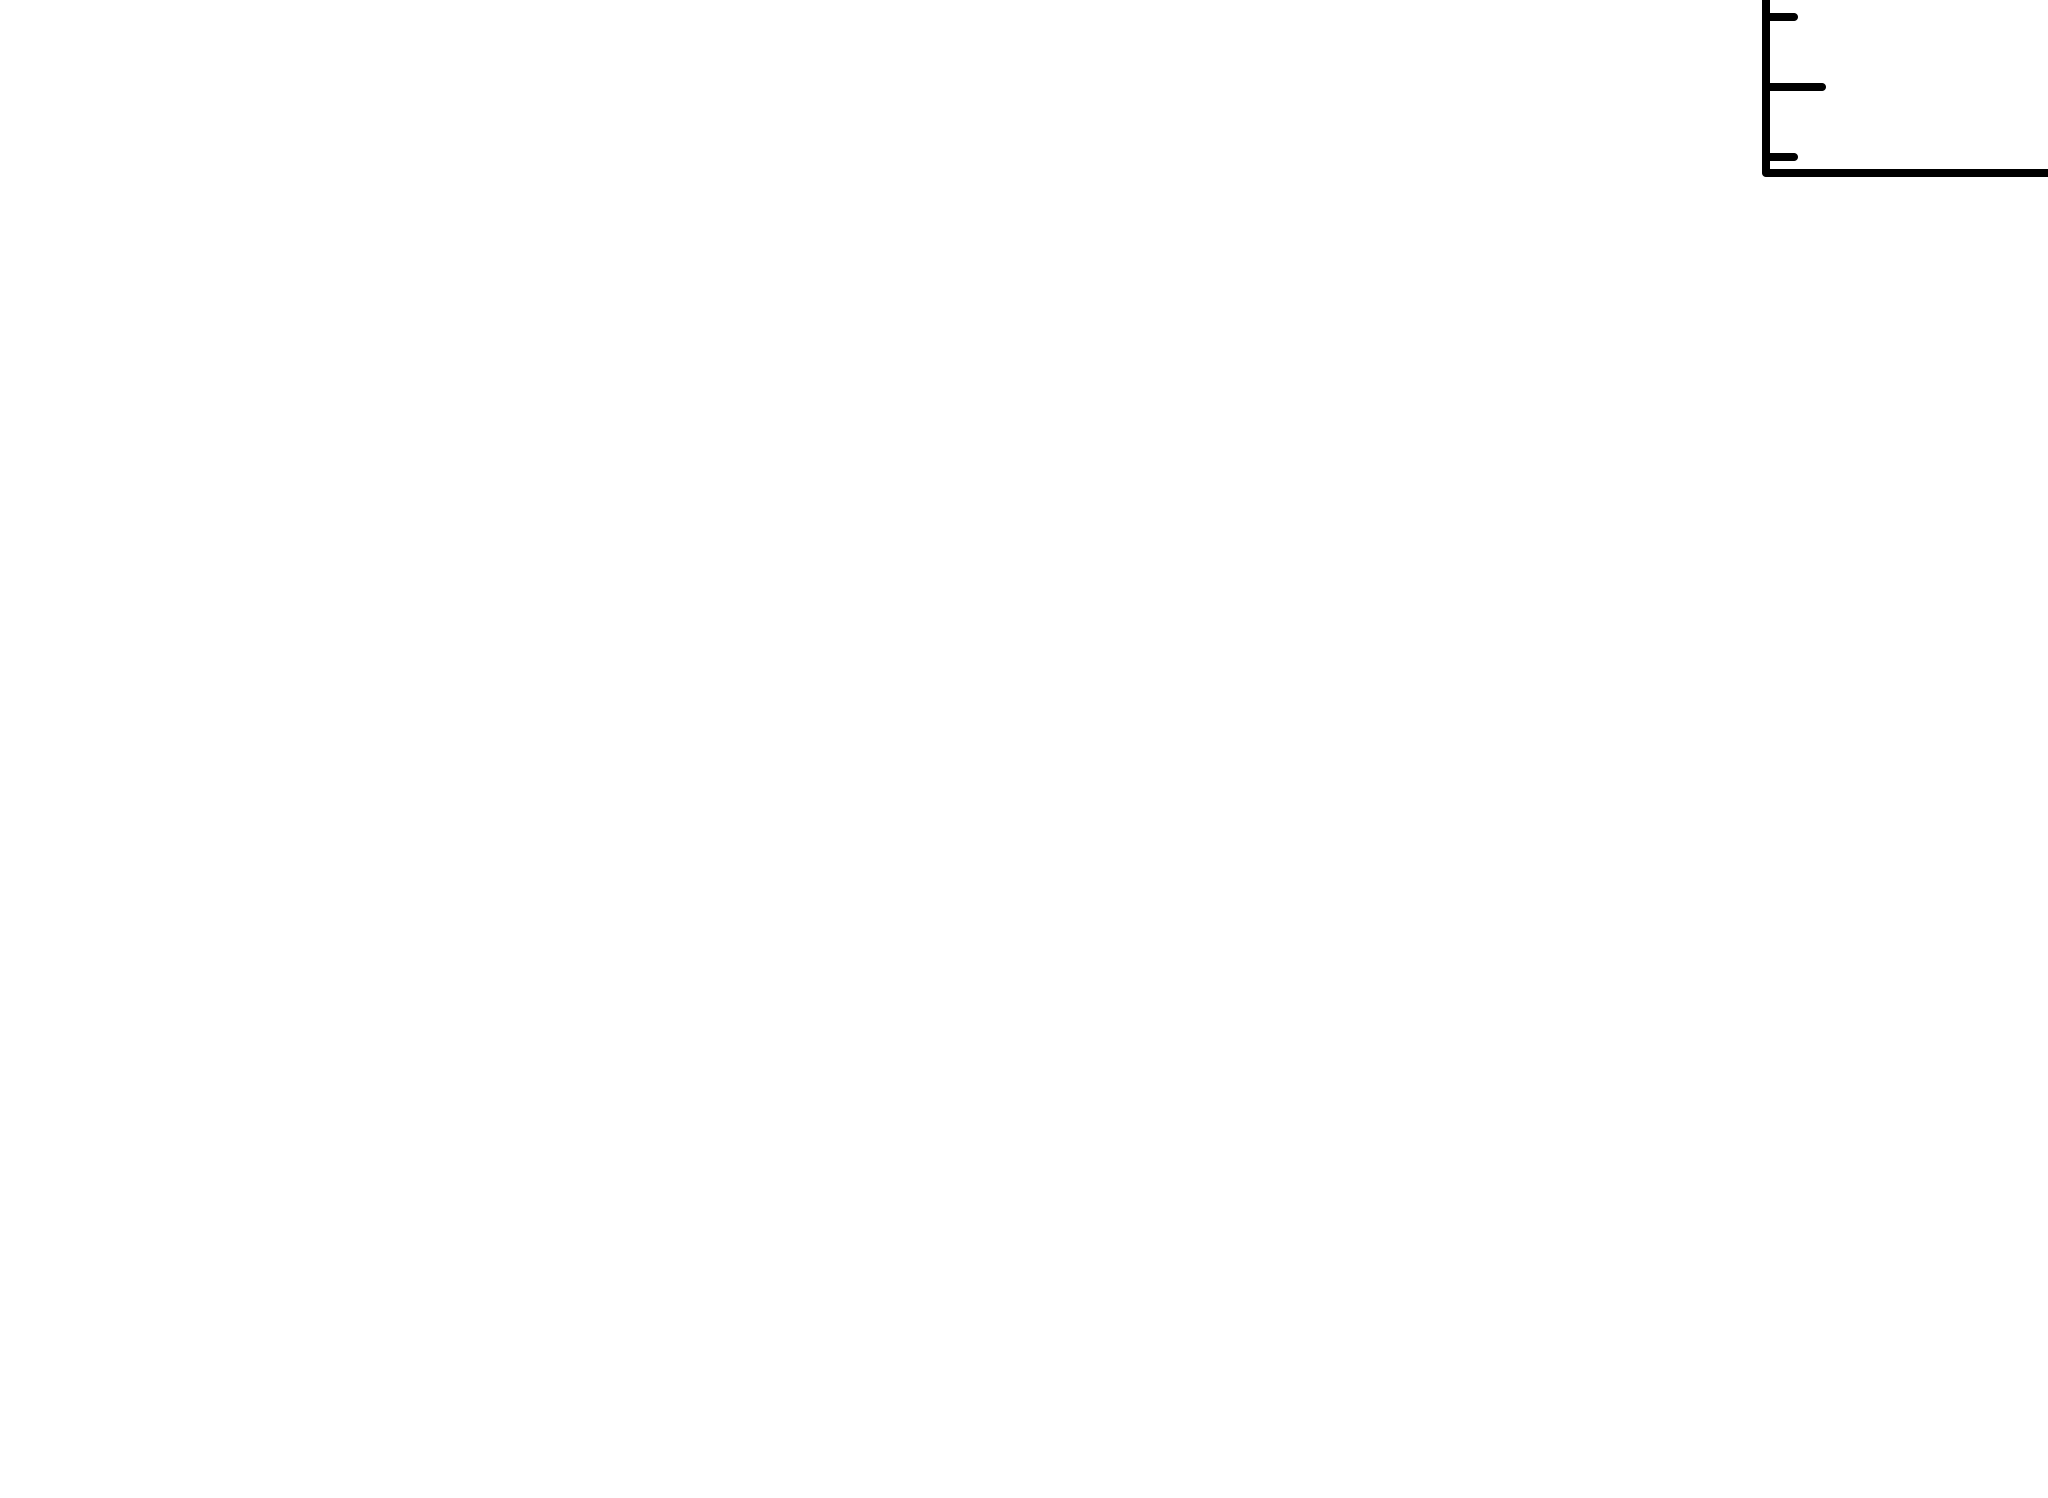


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.289734e+09     using 6 bins.

Test statistic : Chi-Squared              1.289734e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
29.9852      0.150843      0      0.973381       13.8098   0.000124609
28.7767      5210.21       0      0.698294       69.9357   0.000127681
27.246       11740.2      -1      0.530335       198.954   0.000185123
27.

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [8]:
# Fit.error("1")
# Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[3,4:7] = mo.bremss.kT.values[0], np.inf, np.inf
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


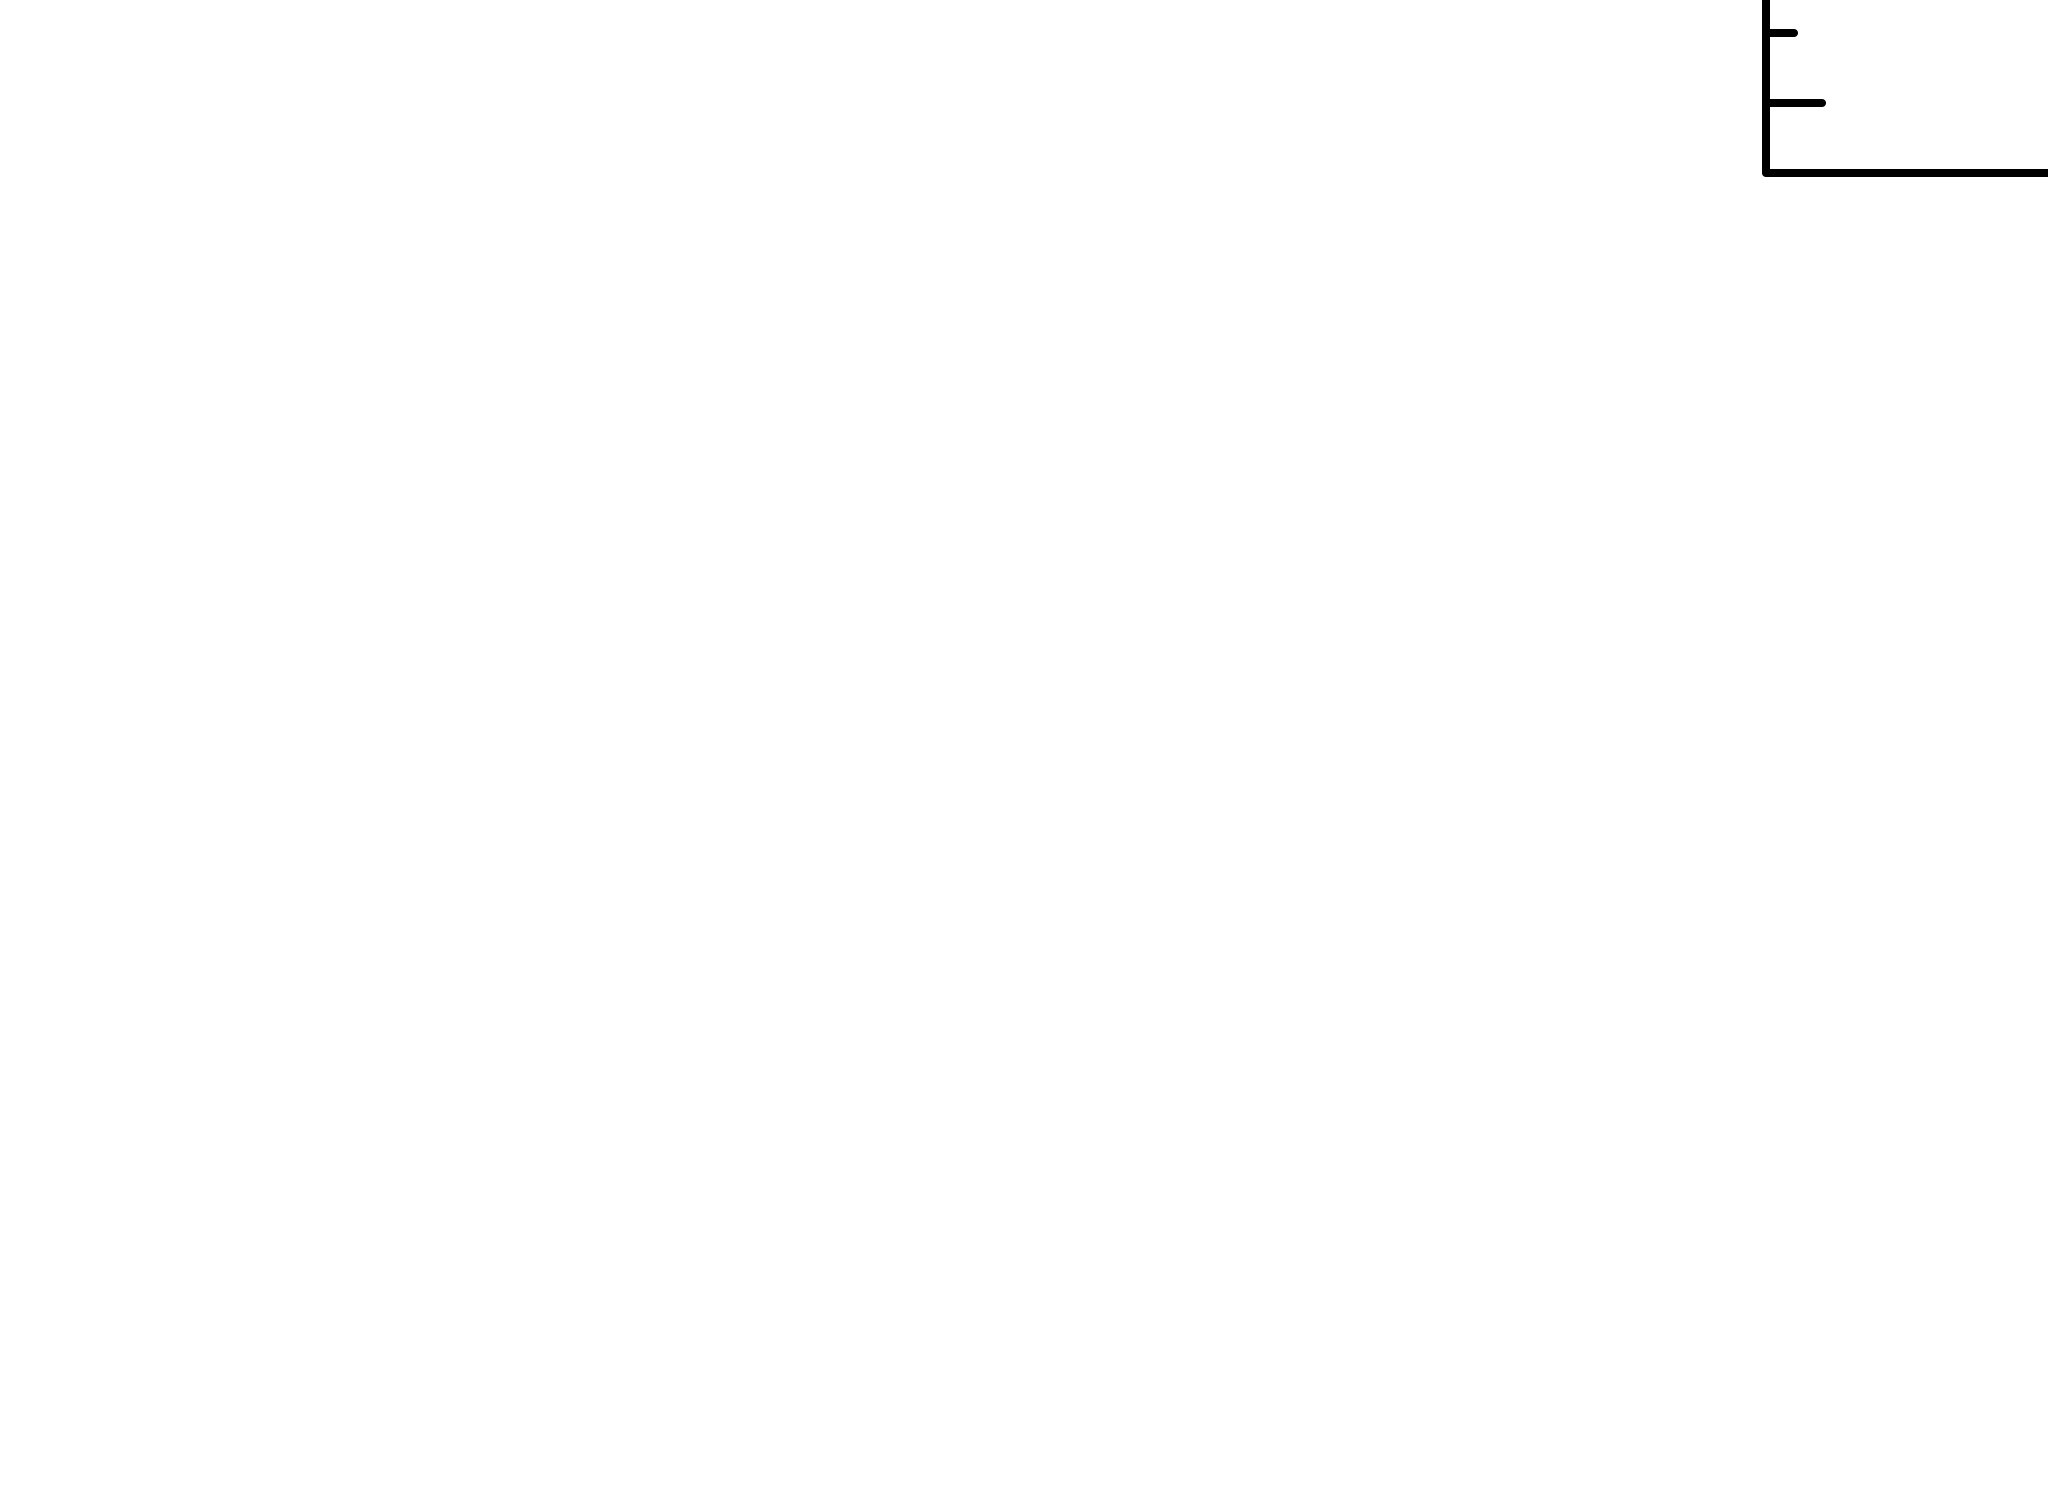


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.785273e+08     using 6 bins.

Test statistic : Chi-Squared              1.785273e+08     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
37.0946      0.691133      0       1.07684       1.16076   0.0

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [10]:
# Fit.error("1")
# Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], np.inf, np.inf
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.829988e+09     using 6 bins.

Test statistic : Chi-Squared              6.829988e+09     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
22.3532      1.33912      -1      0.707828      0.556531   3.26671e-05
16.6693      50783.5      -1      0.232441     0.0181505   1.71349e-05
13.2233      94290.2      -1      0.113848     -0.370412   1.04880e-05
1

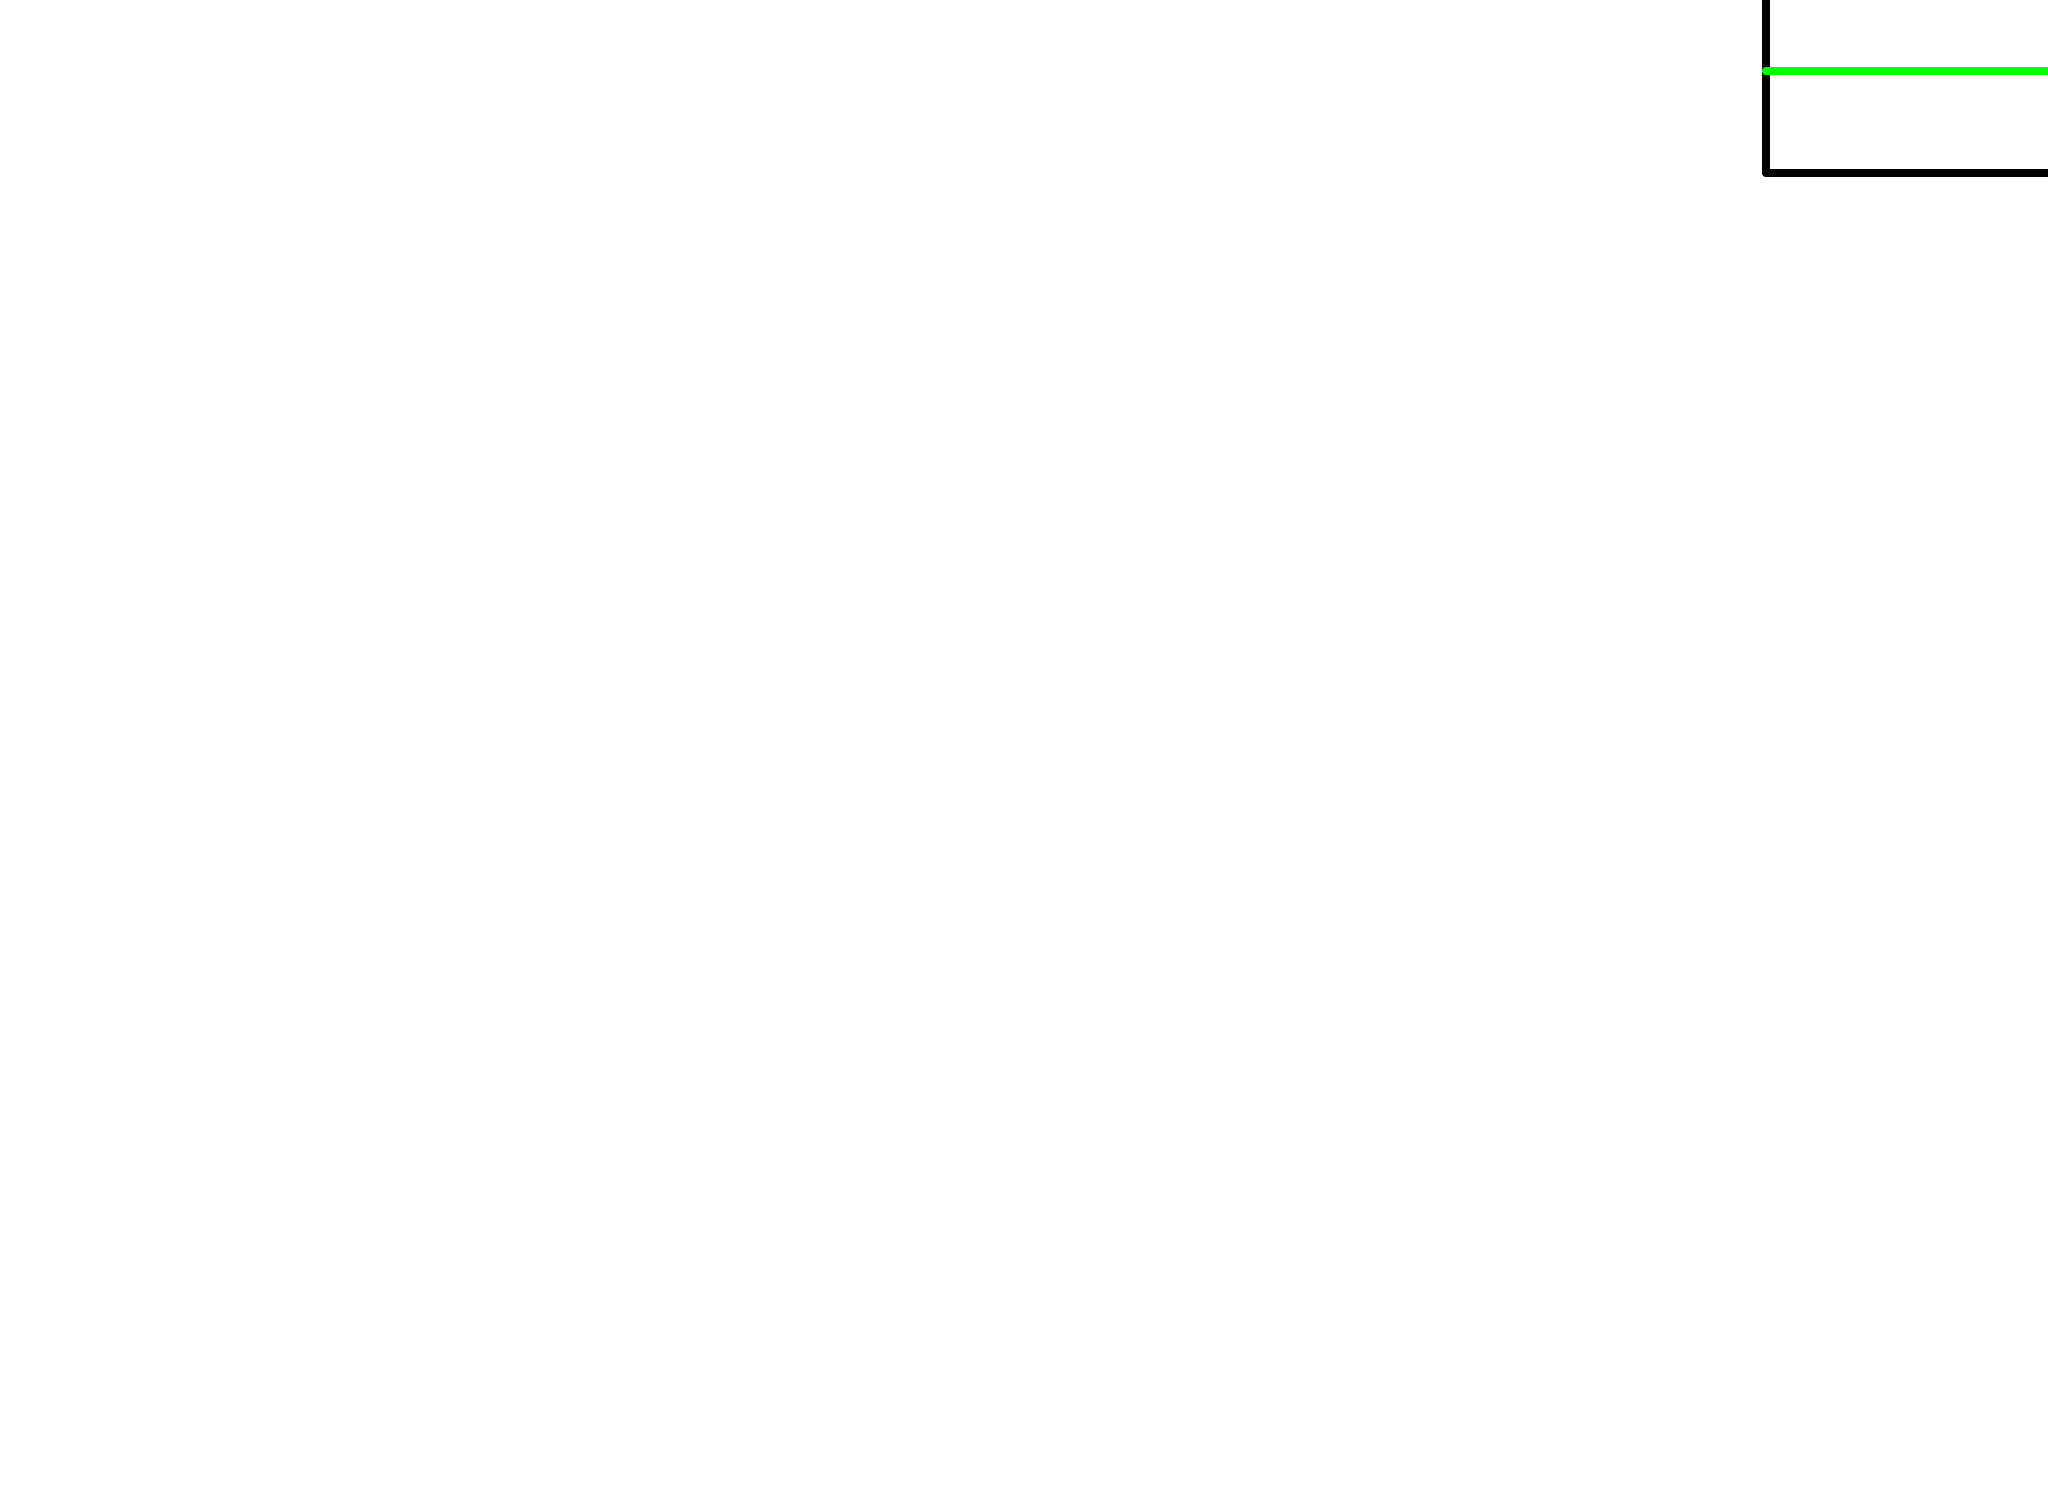

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [12]:
# Fit.error("1")
# Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], np.inf, np.inf
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


In [13]:
np.savetxt('../spec70_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [14]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00035591 photons (4.7098e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [15]:
plx = 0.288
d_kpc = 1/plx
F_x = 4.4343*10**-12

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.394720675732638e+33


In [16]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

3.4722222222222223
33.80582157905121


In [17]:
F_opt = 1.05*10**-5 * 10**(-0.4*17.90)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  7.264225194648832e-13
F_x / F_opt:  0.7856357726442961


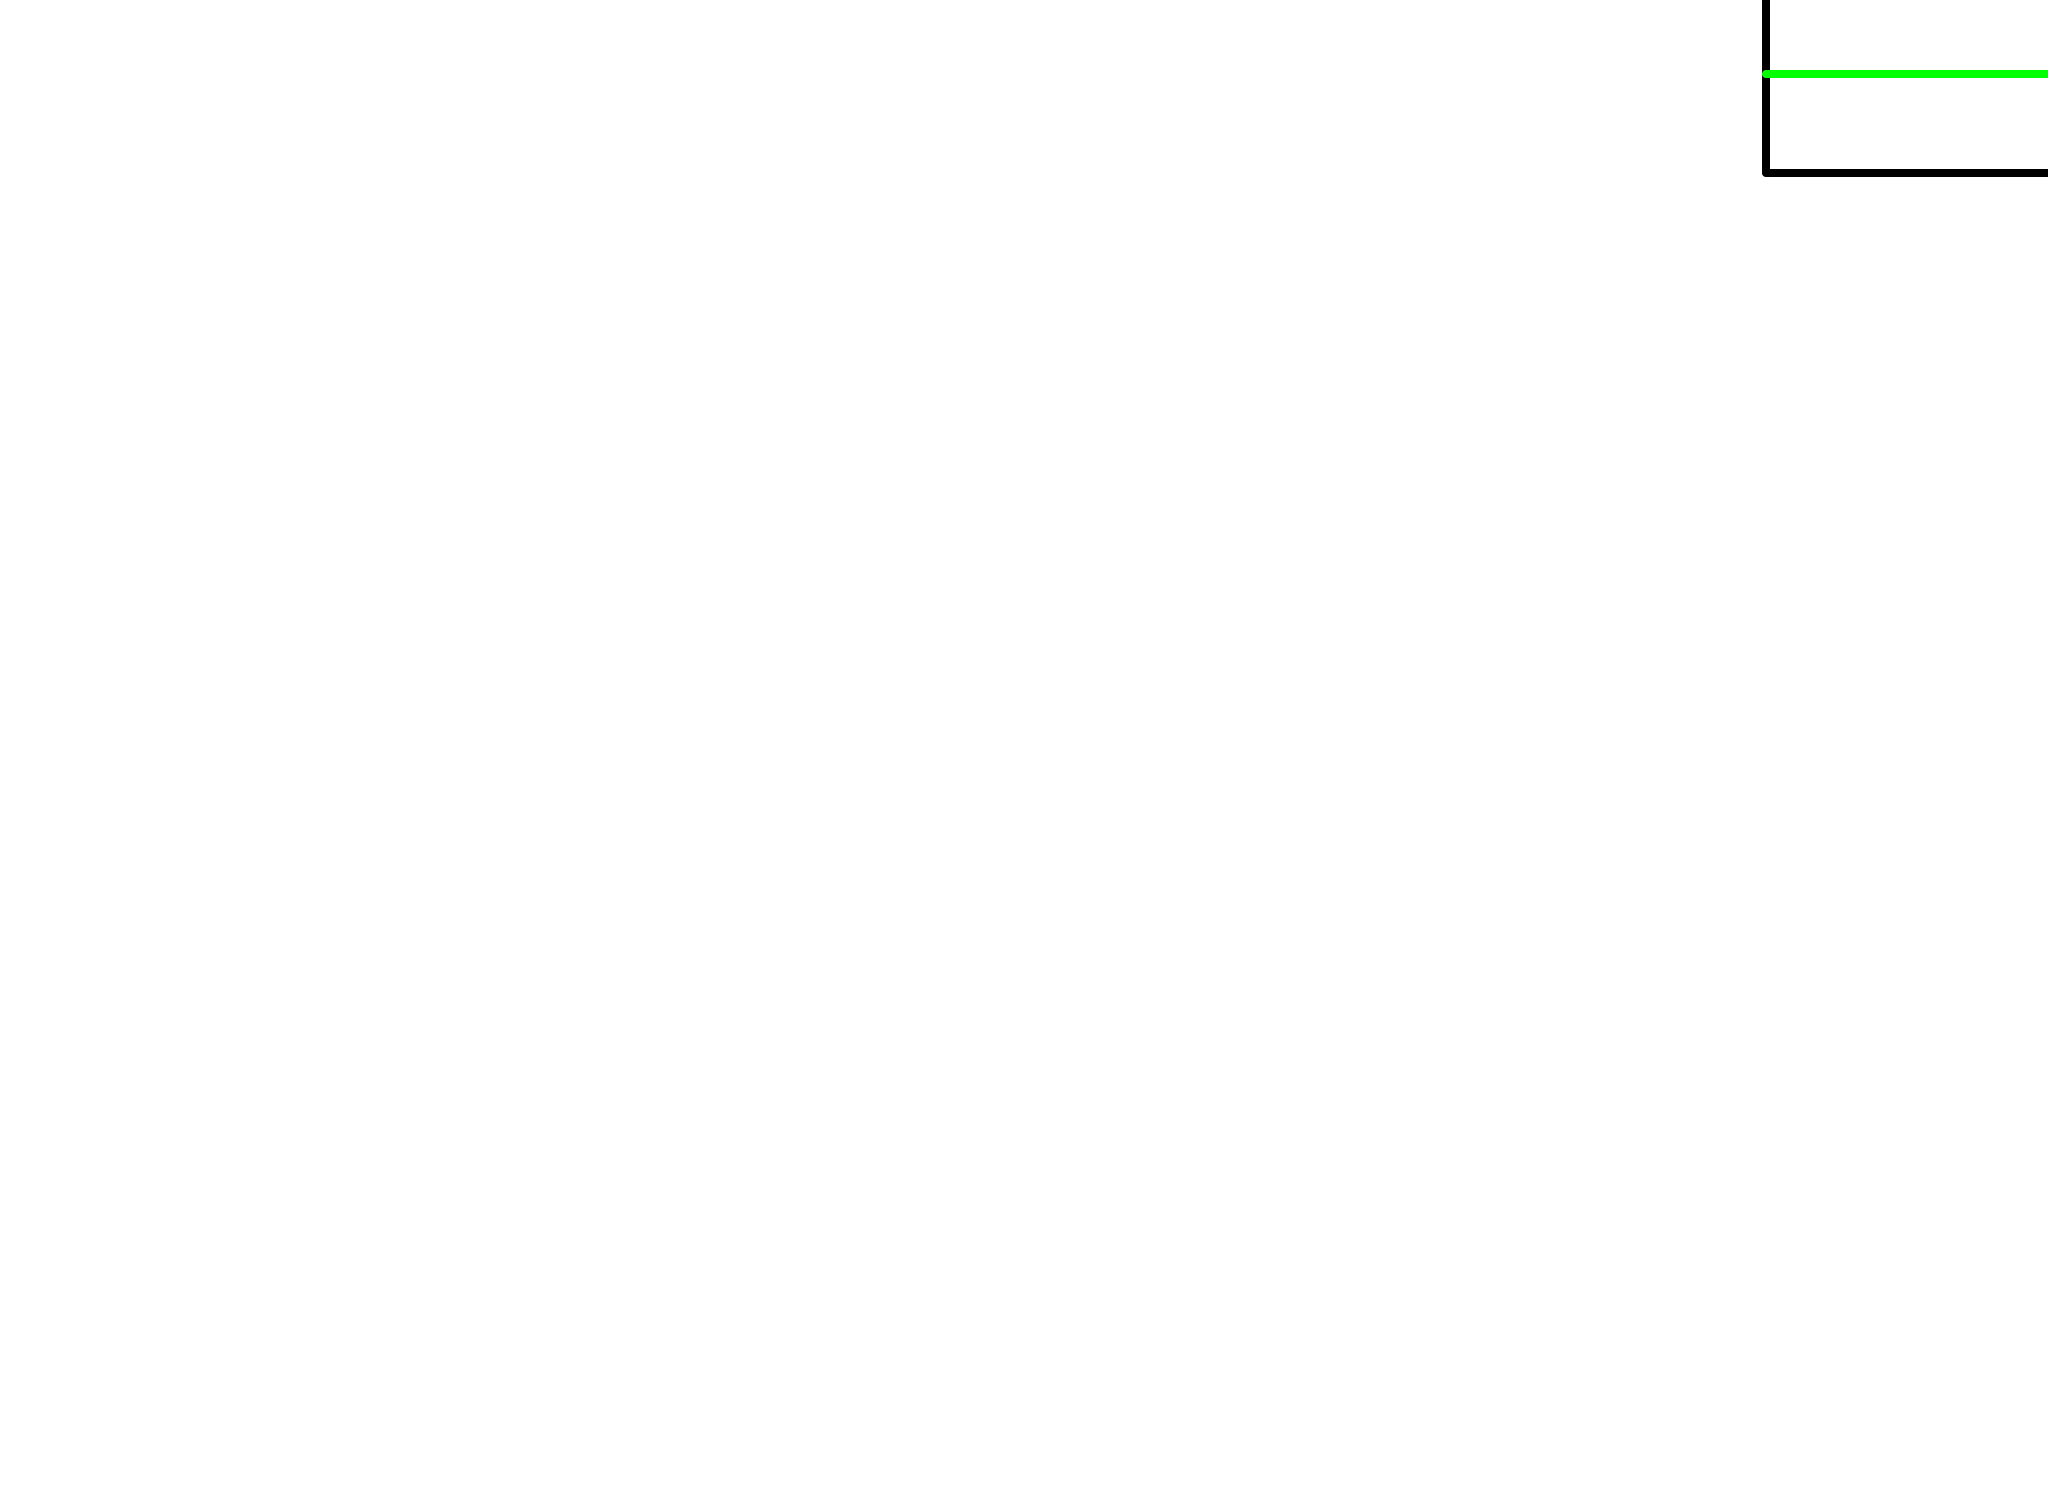


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.011624e+10     using 6 bins.

Test statistic : Chi-Squared              5.011624e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              7.216386e+11     using 6 bins.

Test statistic : Chi-Squared              7.216386e+11     using 6 bins.
 Null hypothesis prob

In [18]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.0
Fit.perform()
Plot("data resid")

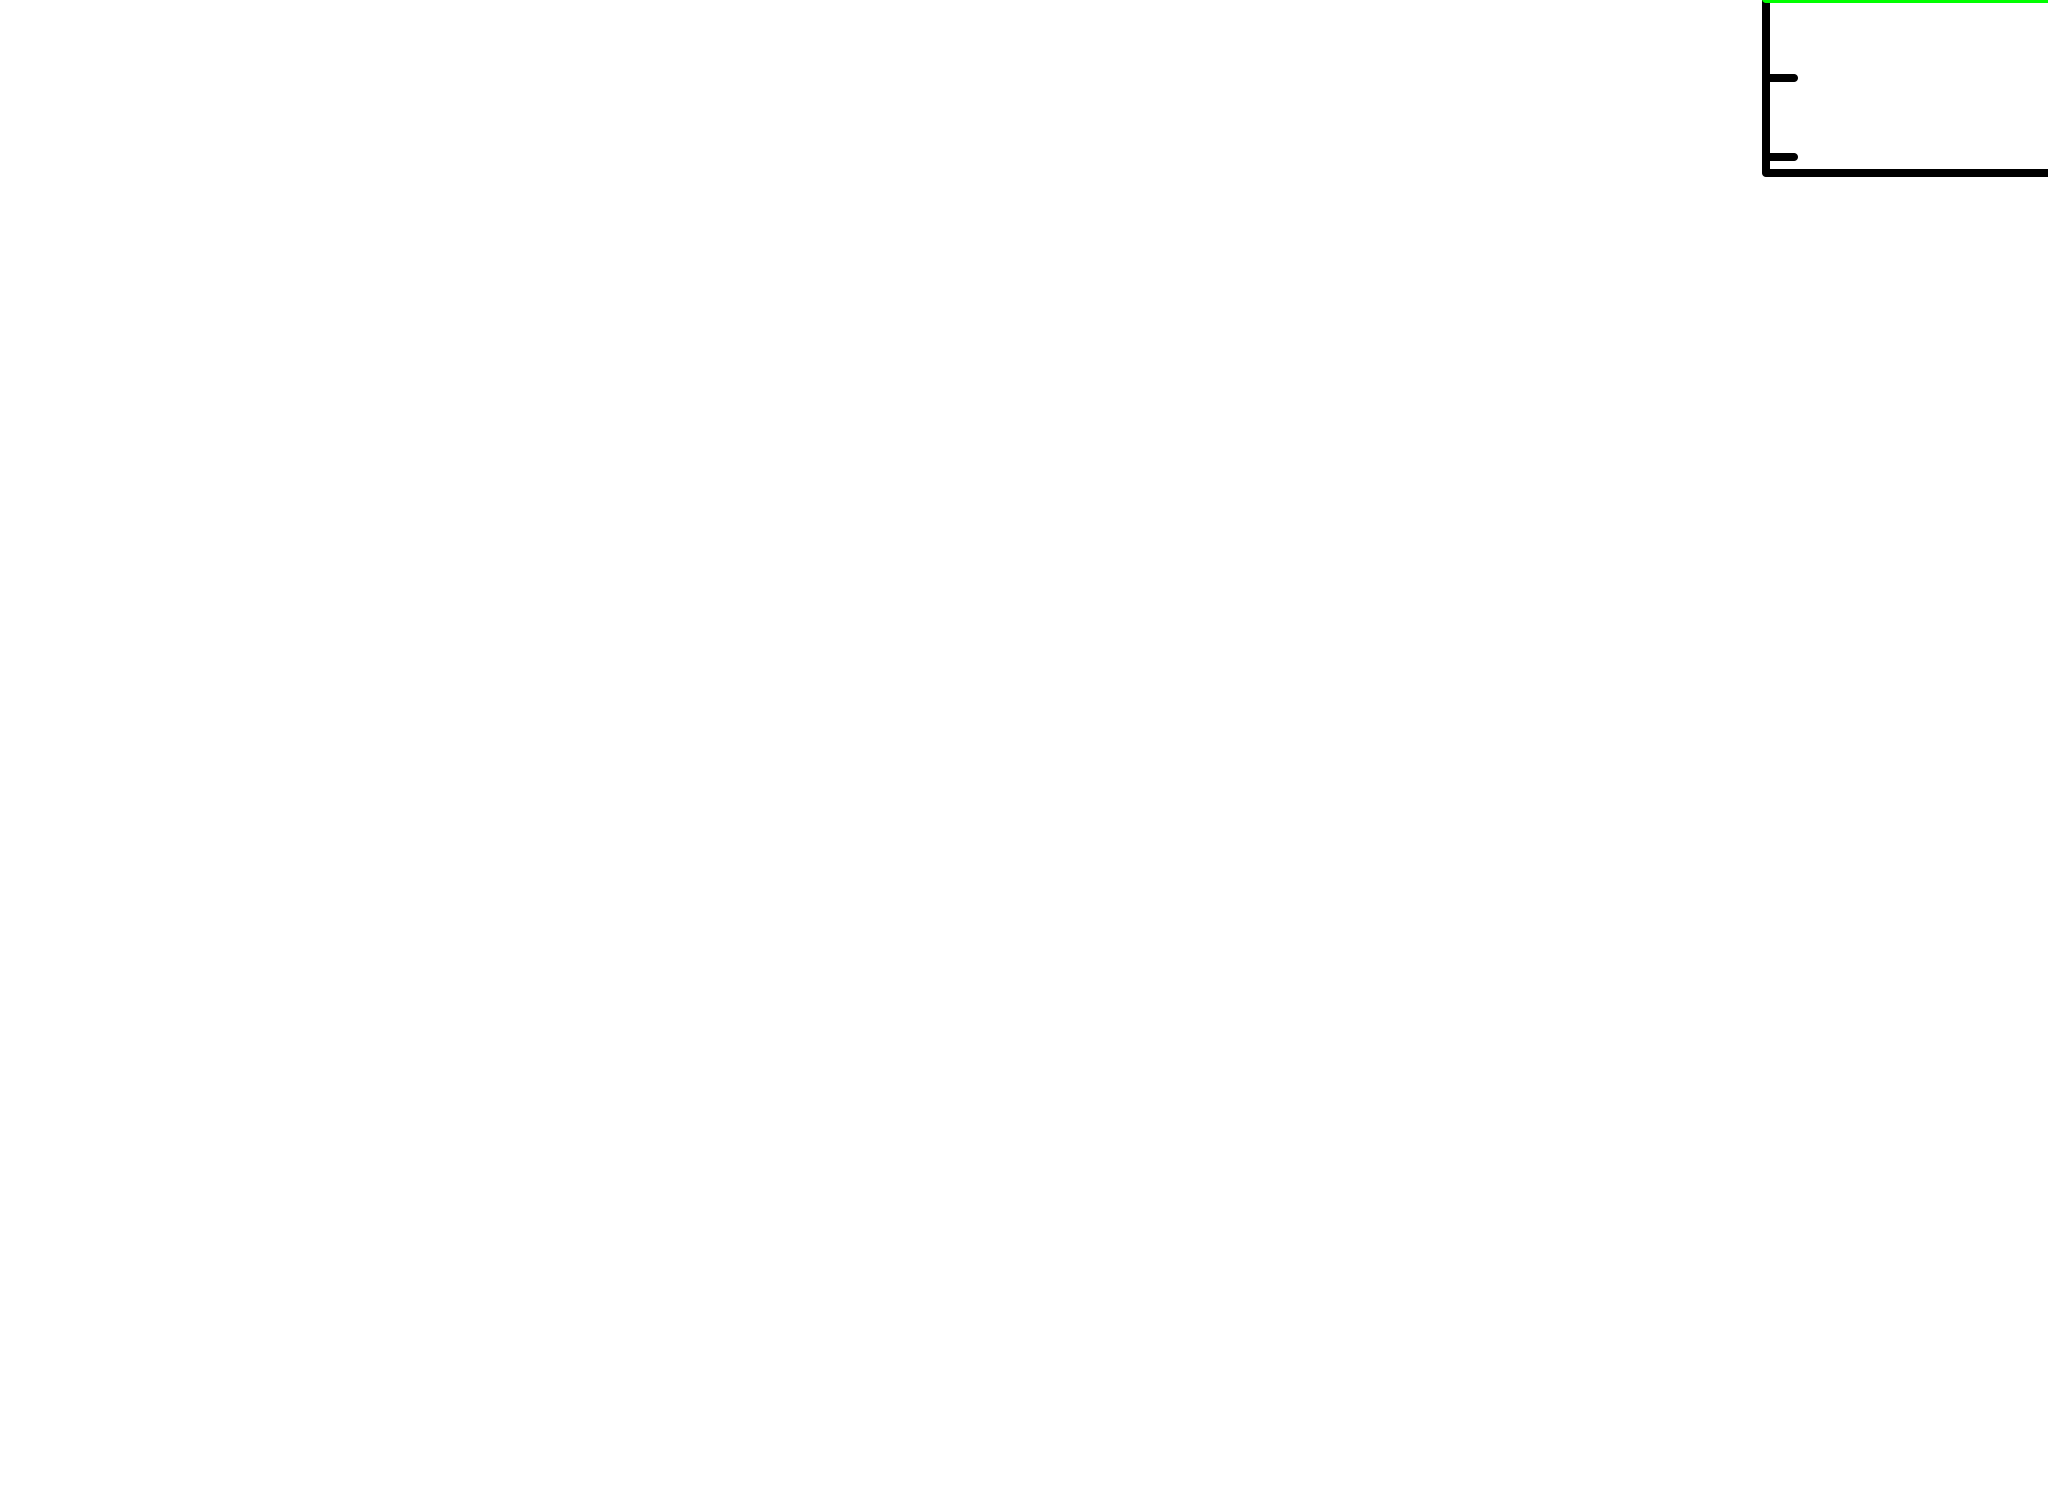


Model TBabs<1>(bbody<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   bremss     kT         keV      7.00000      +/-  0.0          
   5    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.090188e+10     using 6 bins.

Test statistic : Chi-Squared              3.090188e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.289742e+09     using 6 bins.

Test statistic : Chi-Squared              1.289742e+09     using 6 bins.
 Null hypothesis probab

In [19]:
AllModels.clear()
mo = Model("tbabs*(bbody+bremss)")
mo.bbody.kT = 0.05
mo.bremss.kT = 2.0
Fit.perform()
Plot("data resid")